In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:

class Perceptron():
    """
    Parameters
    -----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Number of iteration that model runs for
    random_state: int
        Random state the model uses, used to seed the model
    Attributes
    ----------
    w_ : 1d-array
        Weights of the model
    errors_ : list
        Number of missclassifications (updates) in each epoch
    """
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X,y):
        """Fit training data
        Parameters
        ----------
        X : {array-like}, shape = [n_samples,n_features]
        Training vector where n_sample is number of samples and n_features: number of features
        y: {array-like},shape = [n_samples]
        Returns
        -------
        self:object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0,scale =0.01, size = 1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi,target in zip(X,y):
                update = self.eta*(target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update!=0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        """Calcualte net input"""
        return np.dot(X,self.w_[1:]) + self.w_[0]
    def predict(self,X):
        """Return class label after each unit step"""
        return np.where(self.net_input(X) >= 0,1,-1)

In [3]:
df = pd.read_csv('iris.data',header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


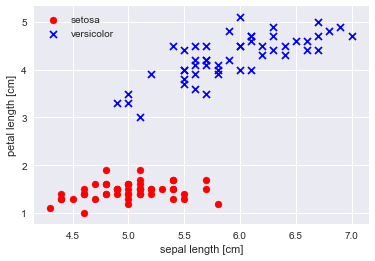

In [4]:
# select setosa and Versicolor which forms the first 100
y = df.iloc[0:100,4].values
y = np.where(y== 'Iris-setosa',-1,1)
# Extract Sepal length and petal length
X = df.iloc[0:100,[0,2]].values
## regular plotting
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa') 
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor') 
plt.xlabel('sepal length [cm]') 
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


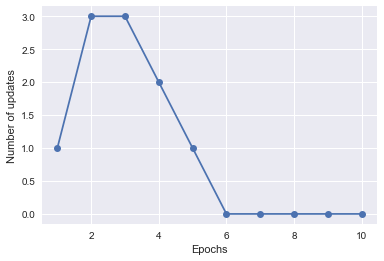

In [5]:
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [6]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

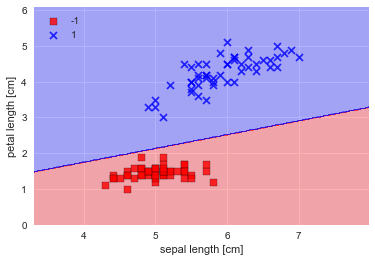

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [10]:
for xi,target in zip(X,y):
    print(xi)
    print('GAP')
    print(target)
    print('end')

[5.1 1.4]
GAP
-1
end
[4.9 1.4]
GAP
-1
end
[4.7 1.3]
GAP
-1
end
[4.6 1.5]
GAP
-1
end
[5.  1.4]
GAP
-1
end
[5.4 1.7]
GAP
-1
end
[4.6 1.4]
GAP
-1
end
[5.  1.5]
GAP
-1
end
[4.4 1.4]
GAP
-1
end
[4.9 1.5]
GAP
-1
end
[5.4 1.5]
GAP
-1
end
[4.8 1.6]
GAP
-1
end
[4.8 1.4]
GAP
-1
end
[4.3 1.1]
GAP
-1
end
[5.8 1.2]
GAP
-1
end
[5.7 1.5]
GAP
-1
end
[5.4 1.3]
GAP
-1
end
[5.1 1.4]
GAP
-1
end
[5.7 1.7]
GAP
-1
end
[5.1 1.5]
GAP
-1
end
[5.4 1.7]
GAP
-1
end
[5.1 1.5]
GAP
-1
end
[4.6 1. ]
GAP
-1
end
[5.1 1.7]
GAP
-1
end
[4.8 1.9]
GAP
-1
end
[5.  1.6]
GAP
-1
end
[5.  1.6]
GAP
-1
end
[5.2 1.5]
GAP
-1
end
[5.2 1.4]
GAP
-1
end
[4.7 1.6]
GAP
-1
end
[4.8 1.6]
GAP
-1
end
[5.4 1.5]
GAP
-1
end
[5.2 1.5]
GAP
-1
end
[5.5 1.4]
GAP
-1
end
[4.9 1.5]
GAP
-1
end
[5.  1.2]
GAP
-1
end
[5.5 1.3]
GAP
-1
end
[4.9 1.5]
GAP
-1
end
[4.4 1.3]
GAP
-1
end
[5.1 1.5]
GAP
-1
end
[5.  1.3]
GAP
-1
end
[4.5 1.3]
GAP
-1
end
[4.4 1.3]
GAP
-1
end
[5.  1.6]
GAP
-1
end
[5.1 1.9]
GAP
-1
end
[4.8 1.4]
GAP
-1
end
[5.1 1.6]
GAP
-1
end
[4.6 1.4]
GAP